### Fashin MNIST
MNIST 패션 이미지를 딥러닝을 이용하여 분류하시오.

In [85]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

(X, y), (X_test, y_test) = fashion_mnist.load_data()
(X1, y1), (X1_test, y1_test) = fashion_mnist.load_data()

In [86]:
X.shape

(60000, 28, 28)

(9, <matplotlib.image.AxesImage at 0x1b73c31bac8>)

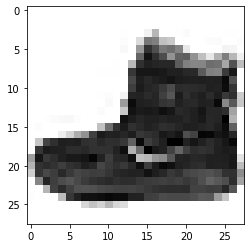

In [87]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary) # Ankle boot

(0, <matplotlib.image.AxesImage at 0x1b73c04ca08>)

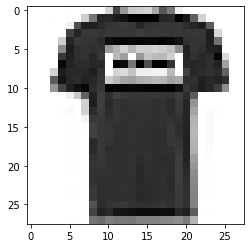

In [88]:
y[1], plt.imshow(X[1],cmap=plt.cm.binary) # T-shirt

손글씨 데이터 분류처럼 패션 데이터를 딥러닝을 이용하여 분류하시오.

In [89]:

y=to_categorical(y)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X = X.reshape((60000, 28*28))
X = X/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [90]:
net.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [91]:
net.fit(X, y, epochs=1, batch_size=128)

469/469 [==============================] - 7s 16ms/step - loss: 0.4876 - acc: 0.8248


In [92]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4015 - acc: 0.8498


In [93]:
X.shape

(60000, 784)

In [94]:
X_val = X[:10000]
partial_X = X[10000:]

y_val = y[:10000]
partial_y = y[10000:]

In [95]:
val = net.fit(partial_X,partial_y,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 16ms/step - loss: 0.3436 - acc: 0.8730 - val_loss: 0.3178 - val_acc: 0.8827A: 0s - loss: 0.3458 
Epoch 2/20
391/391 [==============================] - 6s 16ms/step - loss: 0.3061 - acc: 0.8862 - val_loss: 0.3094 - val_acc: 0.8838
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 0.2788 - acc: 0.8966 - val_loss: 0.3051 - val_acc: 0.8861
Epoch 4/20
391/391 [==============================] - 6s 16ms/step - loss: 0.2595 - acc: 0.9037 - val_loss: 0.3206 - val_acc: 0.8818
Epoch 5/20
391/391 [==============================] - 6s 17ms/step - loss: 0.2418 - acc: 0.9086 - val_loss: 0.3066 - val_acc: 0.8881
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 0.2277 - acc: 0.9139 - val_loss: 0.2933 - val_acc: 0.8903
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 0.2143 - acc: 0.9185 - val_loss: 0.2960 - val_acc: 0.8910
Epoch 8/20
391/391 [============================

In [96]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

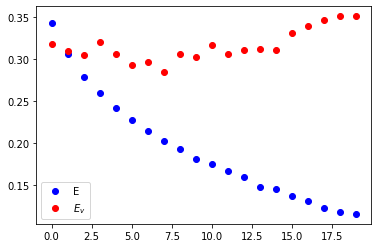

In [97]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

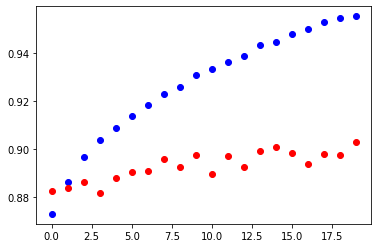

In [98]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [99]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [100]:
val2= model.fit(partial_X,partial_y,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 7s 18ms/step - loss: 0.6300 - acc: 0.7727 - val_loss: 0.4383 - val_acc: 0.8396
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 0.4577 - acc: 0.8334 - val_loss: 0.3760 - val_acc: 0.8617
Epoch 3/20
391/391 [==============================] - 7s 19ms/step - loss: 0.4164 - acc: 0.8498 - val_loss: 0.3632 - val_acc: 0.8642
Epoch 4/20
391/391 [==============================] - 7s 19ms/step - loss: 0.3952 - acc: 0.8563 - val_loss: 0.3371 - val_acc: 0.8763
Epoch 5/20
391/391 [==============================] - 7s 17ms/step - loss: 0.3782 - acc: 0.8630 - val_loss: 0.3438 - val_acc: 0.8713
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.3655 - acc: 0.8666 - val_loss: 0.3173 - val_acc: 0.8816
Epoch 7/20
391/391 [==============================] - 7s 18ms/step - loss: 0.3560 - acc: 0.8694 - val_loss: 0.3198 - val_acc: 0.8811
Epoch 8/20
391/391 [==============================] - 7s 18ms/step - 

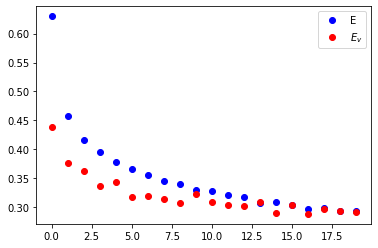

In [102]:
val_dict = val2.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

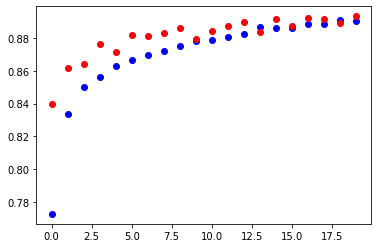

In [103]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [104]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4176 - acc: 0.8936


In [105]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3256 - acc: 0.8812


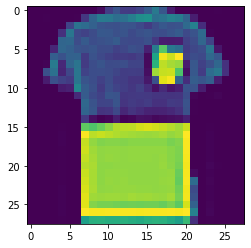

In [106]:
plt.imshow(X1_test[120])

In [107]:
np.argmax(net.predict(X_test)[120])

0


[Label/	Description]
[0	T-shirt/top]
[1	Trouser]
[2	Pullover]
[3	Dress]
[4	Coat]
[5	Sandal]
[6	Shirt]
[7	Sneaker]
[8	Bag]
[9	Ankle boot]

결론 : layers.Dense를 3개로하여 진행 하였습니다. 
Dropout하면 Accuracy가  0.0124 낮아지고 loss 0.092 낮아진 것을 확인 할 수 있습니다. 이미지 파일을 확인하여 판별이 이상없음을 확인 하였습니다. 
MNIST 손글씨 보다 loss가 큰 것을 확인 할 수 있습니다. 이미지가 손글씨보다 복잡하여 이미지 분석에 차이가 있다고 생각되어집니다.